In [41]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [47]:
# load CSV with pandas
iris_data = pd.read_csv("../datasets/iris.csv")

#show the head of the table
print(iris_data.head())

# change string field 'Species' to a numeric representation
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

# convert to numpy array
np_iris = iris_data.to_numpy()

# split the features of the iris from its species
features = np_iris[:,0:4]
species = np_iris[:,4]

# scale feature variables using transform this would make sure
# all vars are in a unified scale
scaler = StandardScaler().fit(features)
features = scaler.transform(features)

# convert the target var options into a one-hot-encoding arrays like this [1., 0., 0.]
# instead of keeping it as a value ranging from 0-2
species = tf.keras.utils.to_categorical(species,3)

# split a percentage of training data from test data
features_train, feature_test, target_train, target_test = train_test_split(features, species, test_size=0.10)


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.

In [43]:
from tensorflow import keras

# the amount of categories in the target var
TARGET_CLASSES = 3

# create keras seq model
model = keras.models.Sequential()

# add hidden layers
for i in range(2):
    model.add(keras.layers.Dense(128,
                                input_shape=(4,),
                                name=f'Hidden-Layer-{i}',
                                activation='relu'))

# add output layer with soft
model.add(keras.layers.Dense(TARGET_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

# set loss function
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

# show info about the model
model.summary()

/home/eshulman/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-0 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6013 - loss: 0.8888 - val_accuracy: 0.8571 - val_loss: 0.5847
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8314 - loss: 0.5261 - val_accuracy: 0.8571 - val_loss: 0.4614
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8603 - loss: 0.4019 - val_accuracy: 0.9286 - val_loss: 0.3945
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8632 - loss: 0.3454 - val_accuracy: 0.9286 - val_loss: 0.3560
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8505 - loss: 0.3525 - val_accuracy: 0.9286 - val_loss: 0.3072
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9238 - loss: 0.2773 - val_accuracy: 0.9286 - val_loss: 0.2655
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8806 - loss: 0.2361 - val_accuracy: 0.9286 - val_loss: 0.2481
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8991 - loss: 0.2526 - val_accuracy: 0.9286 - val_loss: 0.2099
Epoch 9/10
8/

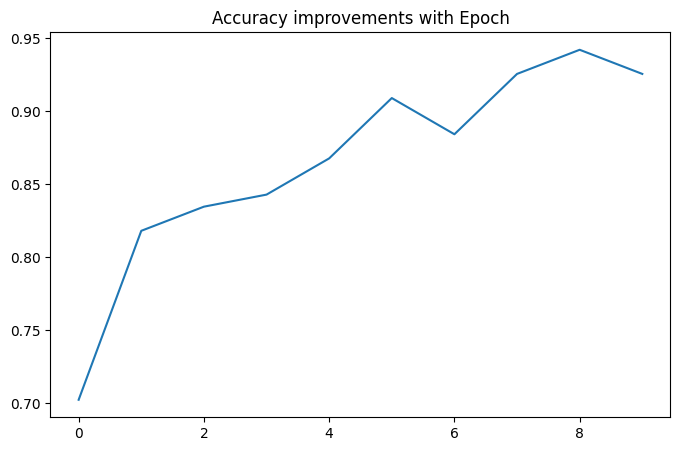

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9333 - loss: 0.0993


[0.09928825497627258, 0.9333333373069763]

In [44]:
VERBOSE = 1

# hyper parameters
BATCH_SIZE = 16
EPOCHS = 10
# use 20% of the training data for validation after epochs
VALIDATION_SPLIT=0.1

# tain the model with keras
history=model.fit(features_train,
          target_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

# evaluate the model against the test dataset and print result
model.evaluate(feature_test,target_test)

In [45]:
# save model
model.save('./iris_identifier.keras')

# load a Model
loaded_model = keras.models.load_model('./iris_identifier.keras')

# model summary
loaded_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-0 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,080 (137.04 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,541 (68.52 KB)

In [46]:
# new test data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

# scale the input data
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Raw Prediction Output (Probabilities) : [[0.01179736 0.67086154 0.3173411 ]]
Prediction is  ['versicolor']
